# 1. Reading Data

In [1]:
import pandas as pd
data="data.CSV"
data = pd.read_csv(data)
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [2]:
data.shape

(2000, 15)

In [3]:
data.dtypes

Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [5]:
x1_most_freq_val = data['Sex'].mode()[0]
x1_most_freq_val

0

In [6]:
x2_most_freq_val = data['Pregnancy'].mode()[0]
x2_most_freq_val

0.0

# 2. Data preprocessing
## 2.1 Dealing with missing values

In [7]:
# Removing column=['Pregnancy'] as it contains large amount of missing data about 1558 samples =~ 78%
data_fill = data.fillna({'Pregnancy':0.0})
data_fill.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0


In [8]:
mask_row = data_fill.isnull().any(axis=1)
print(mask_row)
# calculate number of rows with missing data
num_of_rows_with_nan = mask_row.sum()
# print the ratio of rows with missing data
print('the ratio of rows with missing data:', num_of_rows_with_nan/len(data_fill))
# "the ratio of rows with missing Values : 16.25%""

0        True
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998    False
1999    False
Length: 2000, dtype: bool
the ratio of rows with missing data: 0.1615


In [9]:
mask_col = data_fill.isnull().any(axis=0)
print(mask_col)
# calculate number of columns with missing data
num_of_columns_with_nan = mask_col.sum()
# print the ratio of columns with missing data
print('the ratio of columns with missing data:', num_of_columns_with_nan/len(data_fill))
# "the ratio of columns with missing Values : 0.001"

Patient_Number                   False
Blood_Pressure_Abnormality       False
Level_of_Hemoglobin              False
Genetic_Pedigree_Coefficient      True
Age                              False
BMI                              False
Sex                              False
Pregnancy                        False
Smoking                          False
Physical_activity                False
salt_content_in_the_diet         False
alcohol_consumption_per_day       True
Level_of_Stress                  False
Chronic_kidney_disease           False
Adrenal_and_thyroid_disorders    False
dtype: bool
the ratio of columns with missing data: 0.001


In [10]:
# Filling missing values
# Filling with column average
col_averages = data_fill.mean(axis=0)
data_clean = data_fill.fillna(col_averages)
data_clean.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0


In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   2000 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      2000 non-null   float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    2000 non-null   float64
 12  Level_of_Stress                2000 non-null   i

## 2.2 Preparing input and output


In [12]:
data_input = data_clean.drop(columns=['Patient_Number', 'Blood_Pressure_Abnormality'])
data_input.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0


In [13]:
data_output = data_clean['Blood_Pressure_Abnormality']
data_output.head()

0    1
1    0
2    1
3    0
4    1
Name: Blood_Pressure_Abnormality, dtype: int64

# 3. Splitting the data into (train - validation - test)

We split (data_input, data_output) to (65% : 35%). The 35% is used for testing. And the remaining part is split again to (65% : 35%) for training and validation respectively.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# splitting 35% for testing
X, X_test, y, y_test = train_test_split(
    data_input, data_output, test_size=0.35, random_state=2)

# splitting the remaining part (X, y) to training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.35, random_state=2)

In [16]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (845, 13)
y_train: (845,)
------------
X_val: (455, 13)
y_val: (455,)
------------
X_test: (700, 13)
y_test: (700,)


# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [18]:
import pickle

with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Helper function: Evaluate Classifier

In [19]:
from sklearn.metrics import accuracy_score

'''
    Calculate and return training accuracy 
    and validation accuracy of given classifier
    on given training and validation data
'''
def eval_classifier(clf, X_train, y_train, X_val, y_val):
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    print(clf.__class__.__name__)
    print('acc train:', acc_train)
    print('acc val:', acc_val)
    print('----------------------------')
    return acc_train, acc_val

# Voting Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [21]:
tree_clf = DecisionTreeClassifier(random_state=2)
logistic_clf = LogisticRegression(random_state=2)
svc_clf = SVC(random_state=2)
gaussian_nb = GaussianNB()
estimators = [
    ('tree', tree_clf),
    ('logistic', logistic_clf),
    ('svc', svc_clf),
    ('naivebayes', gaussian_nb),
    ]

voting_clf = VotingClassifier(estimators)

In [22]:
all_estimators = estimators + [('voting', voting_clf)]

results = {
    'Model': [],
    'Acc Train': [],
    'Acc Val': []
}

for (name, clf) in all_estimators:
    acc_train, acc_val = eval_classifier(
        clf, X_train_scaled, y_train, X_val_scaled, y_val
    )
    results['Model'].append(name)
    results['Acc Train'].append(acc_train)
    results['Acc Val'].append(acc_val)

DecisionTreeClassifier
acc train: 1.0
acc val: 0.832967032967033
----------------------------
LogisticRegression
acc train: 0.7526627218934911
acc val: 0.7252747252747253
----------------------------
SVC
acc train: 0.9041420118343195
acc val: 0.8131868131868132
----------------------------
GaussianNB
acc train: 0.8437869822485207
acc val: 0.8351648351648352
----------------------------
VotingClassifier
acc train: 0.8899408284023669
acc val: 0.810989010989011
----------------------------


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=2)

acc_train_rf, acc_val_rf = eval_classifier(
    rf_clf, X_train_scaled, y_train, X_val_scaled, y_val
)

RandomForestClassifier
acc train: 1.0
acc val: 0.8769230769230769
----------------------------


# Adaptive Boosting

In [24]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, min_samples_leaf=20,random_state=2), 
    n_estimators=500,
    learning_rate=0.05,
    random_state=2
)

acc_train_ada, acc_val_ada = eval_classifier(
    ada_clf, X_train_scaled, y_train, X_val_scaled, y_val
)

AdaBoostClassifier
acc train: 0.9479289940828403
acc val: 0.8923076923076924
----------------------------


#  Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbct_clf = GradientBoostingClassifier(random_state=2)

acc_train_gbct, acc_val_gbct = eval_classifier(
    gbct_clf, X_train_scaled, y_train, X_val_scaled, y_val
)

GradientBoostingClassifier
acc train: 0.9573964497041421
acc val: 0.9054945054945055
----------------------------


# Comparing results

In [26]:
final_results = {
    'Model': [],
    'Acc Train': [],
    'Acc Val': []
}

final_results['Model'] = results['Model'] + ['Random Forest','Adaptive Boosting','Gradient Boosting']
final_results['Acc Train'] = results['Acc Train'] + [acc_train_rf, acc_train_ada, acc_train_gbct]
final_results['Acc Val'] = results['Acc Val'] + [acc_val_rf,acc_val_ada, acc_val_gbct]

In [27]:
final_results_df = pd.DataFrame(final_results)

final_results_df.sort_values(by='Acc Val', ascending=False, ignore_index=True, inplace=True)

final_results_df

,Model,Acc Train,Acc Val
0,Gradient Boosting,0.957396,0.905495
1,Adaptive Boosting,0.947929,0.892308
2,Random Forest,1.000000,0.876923
3,naivebayes,0.843787,0.835165
4,tree,1.000000,0.832967
5,svc,0.904142,0.813187
6,voting,0.889941,0.810989
7,logistic,0.752663,0.725275


In [28]:
final_results_df.to_csv('results.csv')

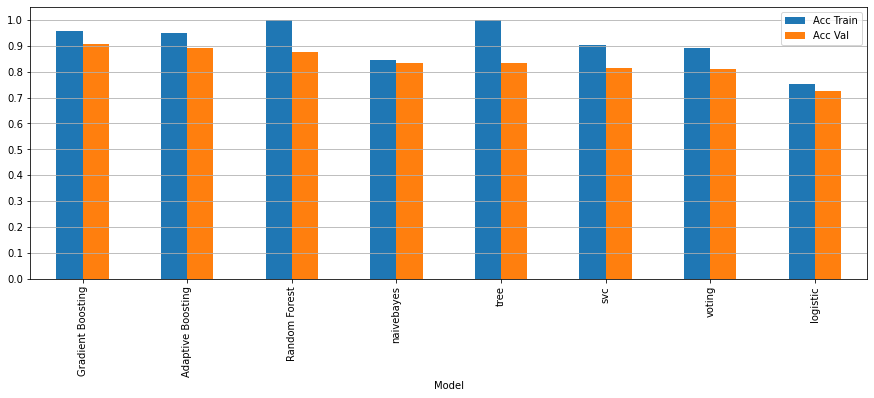

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

final_results_df.plot.bar(x='Model', y=['Acc Train', 'Acc Val'], figsize=(15,5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

# Testing

In [30]:
# Best Model
gbct_clf = GradientBoostingClassifier(random_state=2)
# Training Model
gbct_clf.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=2)

In [31]:
y_pred_test = gbct_clf.predict(X_test_scaled)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_test))

Testing Accuracy: 0.8942857142857142


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [33]:
def eval_model (y_actual,y_pred):
    print("Confusion Matrix:\n",confusion_matrix(y_actual, y_pred))
    print("Precision:",precision_score(y_actual, y_pred))
    print("Recall:   ",recall_score(y_actual, y_pred))
    print("F1Score:  " ,f1_score(y_actual, y_pred))

In [34]:
eval_model(y_test, y_pred_test)

Confusion Matrix:
 [[311  30]
 [ 44 315]]
Precision: 0.9130434782608695
Recall:    0.8774373259052924
F1Score:   0.8948863636363636


# Save model

In [85]:
import pickle

with open('saved-model.pickle', 'wb') as f:
    pickle.dump(gbct_clf, f)

### Feature importances
Not all features are important. As we can see, some features are even not used at all!. We can use the array gbct_clf.feature_importances_ to know the degree of importance of each feature.

In [86]:
feature_names = ["Level_of_Hemoglobin",
                 "Genetic_Pedigree_Coefficient",
                 "Age","BMI","Sex","Pregnancy",
                 "Smoking","Physical_activity",
                 "salt_content_in_the_diet",
                 "alcohol_consumption_per_day",
                 "Level_of_Stress",
               " Chronic_kidney_disease",
                 "Adrenal_and_thyroid_disorders"]

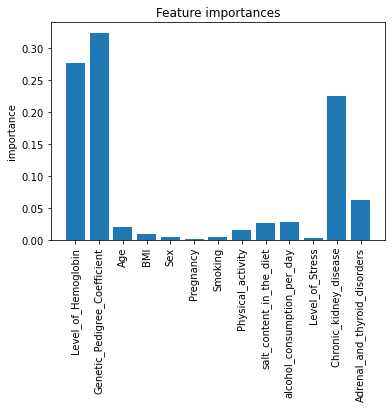

In [87]:
plt.bar(fefrom sklearn import gradientboosting
ature_names, gbct_clf.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.title('Feature importances')
plt.show()